<a href="https://colab.research.google.com/github/krishnapriya333/Public/blob/main/Krishnapriya_K_obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**

You are a data scientist working for a health and wellness company that aims to promote healthy living
and combat obesity. The company has collected data from individuals regarding their demographic
information, eating habits, and physical condition. Your task is to develop a machine learning model that
can accurately predict the weight category of individuals based on these factors.
The goal of the model is to help individuals understand their risk of obesity based on their lifestyle
choices and provide personalized recommendations for healthier living. By accurately predicting obesity
risk, the company aims to empower individuals to make informed decisions about their health and well being.

**Problem Statement**

 To Build a machine learning model to predict the weight category of individuals based on
their demographic information, eating habits, and physical condition.


**Dataset Description**

• Gender

• Age

• Height

• Weight

• Eating Habits:

o FAVC: Frequent consumption of high caloric food

o FCVC- Frequency of consumption of vegetables

o NCP: Number of main meals per day

o CAEC: Consumption of food between meals

o CH2O: Consumption of water daily

o CALC: Consumption of alcohol

• Physical Condition:

o SCC: Calories consumption monitoring

o FAF: Physical activity frequency

o TUE: Time using technology devices

o MTRANS: Transportation used

**EDA**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/sample_data/Obesity.csv')

In [3]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [20]:
df.head(30)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [5]:
df.shape

(2111, 17)

In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
df.nunique()

Gender                               2
Age                               1406
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [9]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

**Data Preprocessing**

In [10]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
#missing values
df.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

**Missing Value Handling**

In [22]:

df['Height'] = df['Height'].fillna(df['Height'].mean())

In [24]:
df.isnull().sum()

Gender                            9
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    6
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              9
SMOKE                             0
CH2O                              0
SCC                               7
FAF                               0
TUE                               0
CALC                              0
MTRANS                            7
NObeyesdad                        0
dtype: int64

In [25]:
df.mode()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,18.0,1.7,80.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_I


In [26]:
df = df.fillna(df.mode().iloc[0])

In [27]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [28]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Correlation Analysis**

<ipython-input-29-084798591dac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

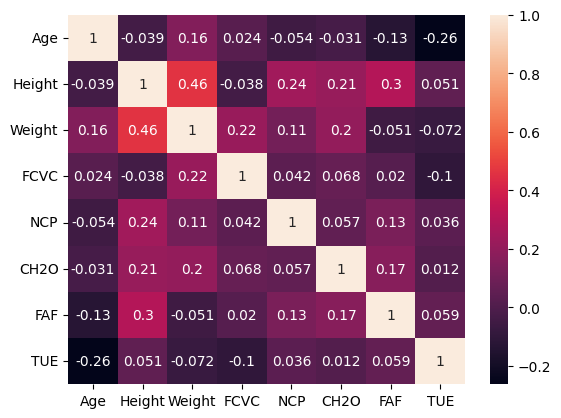

In [29]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

Weight and height positively correlated and strong correlation compared to other features

**Data Visualization**

**Univariate Analysis**

yes    1728
no      383
Name: family_history_with_overweight, dtype: int64

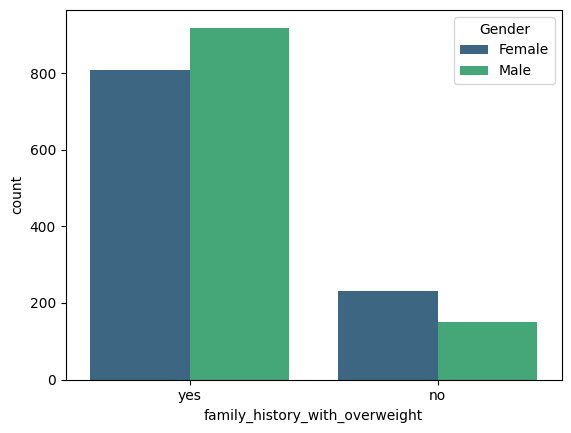

In [35]:
sns.countplot(x='family_history_with_overweight',data=df,hue='Gender',palette ='viridis')
df['family_history_with_overweight'].value_counts()

those who have family history with overweight is higher in males compared to females.
Those who have not family history in overweigth is higher in females compared to males

yes    1866
no      245
Name: FAVC, dtype: int64

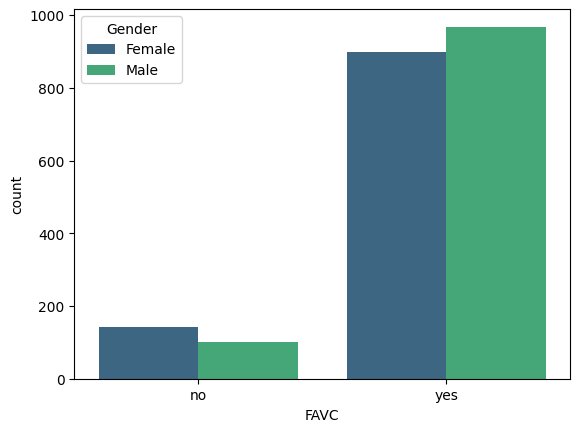

In [36]:
sns.countplot(x='FAVC',data=df,hue='Gender',palette ='viridis')
df['FAVC'].value_counts()

those who have frequent consumption of high caloric food is higher in males compared to females

<ipython-input-37-2a2fb069bd1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Weight,bins=20,color='g')


<Axes: xlabel='Weight', ylabel='Density'>

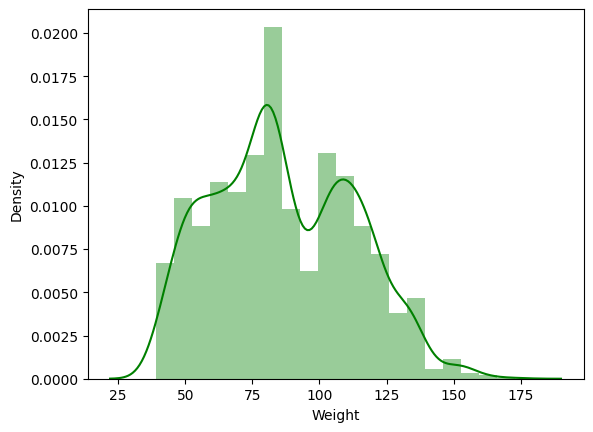

In [37]:
 sns.distplot(df.Weight,bins=20,color='g')

<Axes: xlabel='Weight'>

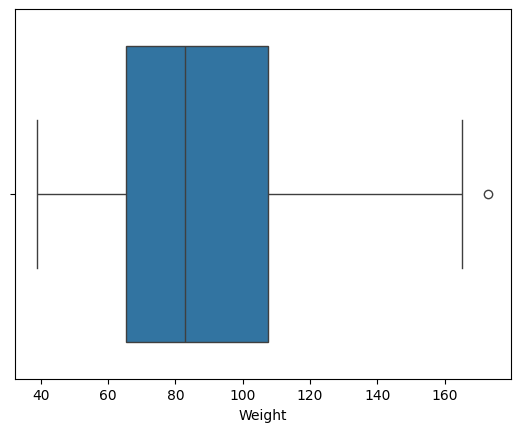

In [38]:
sns.boxplot(x='Weight',data=df)

one outlier detected in weight feature

<Axes: xlabel='Height'>

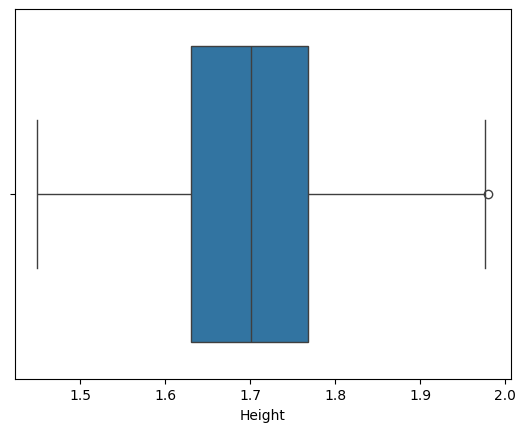

In [39]:
sns.boxplot(x='Height',data=df)

**Bivariate Analysis**

<Axes: xlabel='Weight', ylabel='Height'>

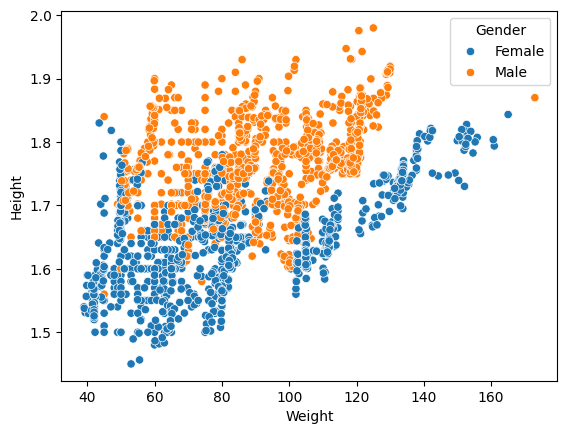

In [45]:
sns.scatterplot(x='Weight',y='Height',hue='Gender',data=df)

male candidates are higher in height and weight compared to females

<Axes: xlabel='Weight', ylabel='Height'>

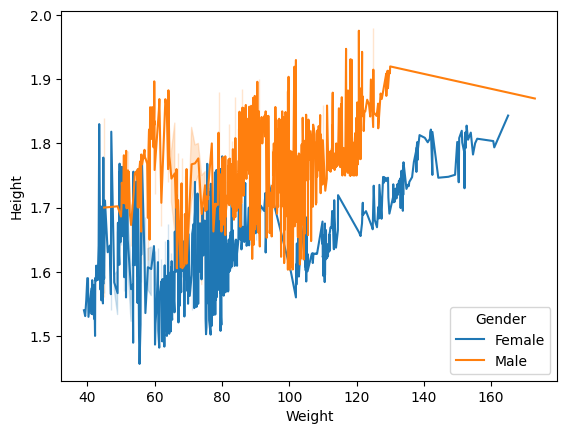

In [46]:
sns.lineplot(x='Weight',y='Height',hue='Gender',data=df)

<Axes: xlabel='family_history_with_overweight', ylabel='Weight'>

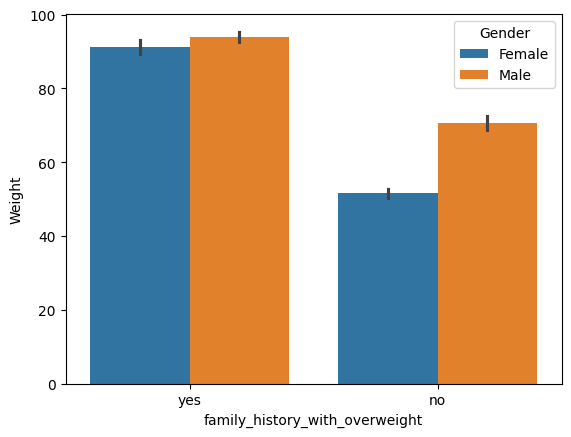

In [47]:
sns.barplot(x='family_history_with_overweight',y='Weight',hue='Gender',data=df)

male candidates who have family history with overweight have more weight compared to females
male candidates who have not family history with overweight have more weight compared to females

<Axes: xlabel='Gender', ylabel='Weight'>

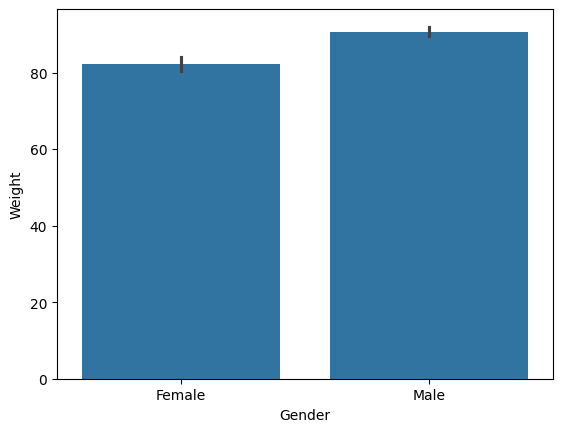

In [48]:
sns.barplot(x='Gender',y='Weight',data=df)


males candidates have more weight compared to females

**introducing dummy variables**

In [51]:
data = pd.get_dummies(df)

In [52]:
data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [54]:
data.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                           uint8
Gender_Male                             uint8
family_history_with_overweight_no       uint8
family_history_with_overweight_yes      uint8
FAVC_no                                 uint8
FAVC_yes                                uint8
CAEC_Always                             uint8
CAEC_Frequently                         uint8
CAEC_Sometimes                          uint8
CAEC_no                                 uint8
SMOKE_no                                uint8
SMOKE_yes                               uint8
SCC_no                                  uint8
SCC_yes                           

In [62]:
X= data.drop('Weight',axis=1)
y=data['Weight']

In [63]:
X.head()

,Age,Height,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,1.62,2.0,3.0,2.0,0.0,1.0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,21.0,1.52,3.0,3.0,3.0,3.0,0.0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,23.0,1.80,2.0,3.0,2.0,2.0,1.0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,27.0,1.80,3.0,3.0,2.0,2.0,0.0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
4,22.0,1.78,2.0,1.0,2.0,0.0,0.0,0,1,1,...,0,1,0,0,0,0,0,0,0,1


In [58]:
X.shape

(2111, 16)

In [57]:
y.head()

0    64.0
1    56.0
2    77.0
3    87.0
4    89.8
Name: Weight, dtype: float64

In [60]:
y.shape

(2111,)

In [65]:
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(2111, 1)

**Modelling**

**Splitting the data**

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1688, 37) (423, 37) (1688, 1) (423, 1)


**Linear Regression**

In [69]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_test)

In [71]:
y_pred

array([[-1.08492397e+00],
       [ 1.04398228e+00],
       [-8.36388811e-01],
       [-1.97506069e+00],
       [-5.37926897e-01],
       [-1.29830287e+00],
       [ 1.26590611e+00],
       [-7.01256975e-01],
       [-2.38732561e-01],
       [-1.29879115e+00],
       [ 1.69470564e-01],
       [ 1.81888463e+00],
       [ 7.39783064e-01],
       [ 1.10190465e+00],
       [ 1.17337681e+00],
       [-4.09922502e-01],
       [ 1.22196080e+00],
       [ 7.89709822e-01],
       [ 5.59119002e-01],
       [-1.64805314e-01],
       [ 9.18494002e-01],
       [-3.64709123e-01],
       [ 1.04984166e+00],
       [ 5.80603377e-01],
       [-1.11153530e+00],
       [-6.92149064e-01],
       [-1.92637346e-01],
       [ 1.89163853e+00],
       [ 1.05814244e+00],
       [-1.23580287e+00],
       [ 1.16385533e+00],
       [-5.33410295e-01],
       [-3.55235002e-01],
       [-1.16011928e+00],
       [-1.60787319e+00],
       [ 1.31473424e+00],
       [ 5.64490095e-01],
       [-9.18053850e-01],
       [-1.5

**Model Evaluation and Fine Tuning**

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:' ,mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)



Mean Absolute Error: 0.14325662702076766
Mean Squared Error: 0.04100374383392697
RMSE: 0.20249381184107076
R^2 Score: 0.9601278052459916


linear regression model has an accuracy of 0.96 . this model is best fit for the data

we will try another regression models to get better result

**Decision Tree Regression**

In [78]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(criterion='squared_error',max_depth=3,random_state = 0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
mae = mean_absolute_error(y_test, dtc_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test, dtc_pred)
print('Mean Squared Error:' ,mse)

rmse = np.sqrt(mean_squared_error(y_test, dtc_pred))
print('RMSE:', rmse)

r2 = r2_score(y_test, dtc_pred)
print('R^2 Score:', r2)

Mean Absolute Error: 0.334114335621316
Mean Squared Error: 0.22722541899881818
RMSE: 0.4766816747042183
R^2 Score: 0.7790451477778062


**Random Forest Regressor**

In [108]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 100,max_depth = 25, random_state=42,verbose=1,n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

<ipython-input-108-fe886c807558>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
mae = mean_absolute_error(y_test, rfc_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test, rfc_pred)
print('Mean Squared Error:' ,mse)

rmse = np.sqrt(mean_squared_error(y_test, rfc_pred))
print('RMSE:', rmse)

r2 = r2_score(y_test, rfc_pred)
print('R^2 Score:', r2)

Mean Absolute Error: 0.06443836387749297
Mean Squared Error: 0.013052711842710263
RMSE: 0.11424846538448673
R^2 Score: 0.9873074939018159


**K Nearest Neighbour**

In [82]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
mae = mean_absolute_error(y_test, knn_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error:' ,mse)

rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
print('RMSE:', rmse)

r2 = r2_score(y_test, knn_pred)
print('R^2 Score:', r2)

Mean Absolute Error: 0.11718494778465142
Mean Squared Error: 0.044845311054758766
RMSE: 0.21176711514009622
R^2 Score: 0.9563922508290585


**Support Vector Machine**

In [86]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
mae = mean_absolute_error(y_test, svr_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test, svr_pred)
print('Mean Squared Error:' ,mse)

rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
print('RMSE:', rmse)

r2 = r2_score(y_test, svr_pred)
print('R^2 Score:', r2)

Mean Absolute Error: 0.11450909602256792
Mean Squared Error: 0.03179233608338323
RMSE: 0.17830405515125905
R^2 Score: 0.9690850127945465


Here we can say that Randomforest regressor has better accuracy of 0.98 comapared to other regression algorithms
so,random forest model is good fit for the data